In [1]:
# import mudules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# import data
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
full_df = pd.concat([train_df, test_df])

In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
test_df.describe()train_df.describe(include=['O'])

In [ ]:
test_df.describe(include=['O'])

## uni-varaible exploration

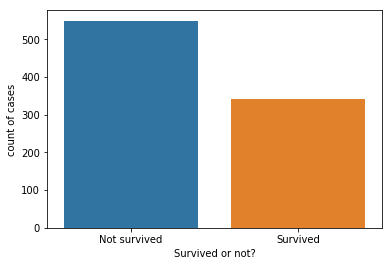

In [6]:
# survived or not?
survived = train_df['Survived'].map({0:'Not survived',1:'Survived'})
#survived
sns.countplot(survived)
plt.xlabel('Survived or not?')
plt.ylabel('count of cases')
plt.show()


In [165]:
#sex in training case (male, female)
train_sex = train_df['Sex']
#train_sex = train_sex.apply(lambda sex: 1 if sex=='male' else 0)

male_count = train_sex[train_sex=='male'].count()
female_count = train_sex[train_sex=='female'].count()

print('Male count: ', male_count)
print('Female count:', female_count)


Male count:  577
Female count: 314


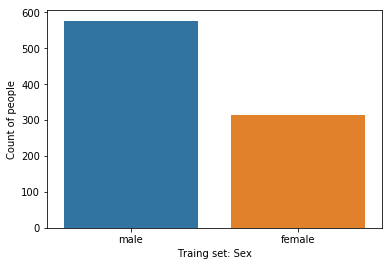

In [166]:
sns.countplot(train_sex)
plt.xlabel('Traing set: Sex')
plt.ylabel('Count of people')
plt.show()

In [ ]:
train_sex = train_df[['Sex','Survived']]

In [57]:
# Age (child, adult, elder) (嘗試continious or discrete)
# No.1 continious

age = train_df['Age']
age.fillna(0, inplace=True)


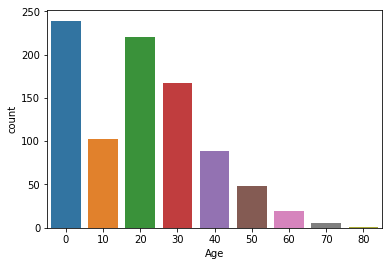

In [102]:
# Age bar 分佈圖
ageData = age.apply(lambda age : int(age//10*10))

sns.countplot(ageData)

In [98]:
# Age 分類(child, adult, elder)
ageCatData = age.apply(lambda age: 'adult' if (age//10) > 1 and (age//10) < 7 else('child' if (age//10) < 2 else 'elder'))


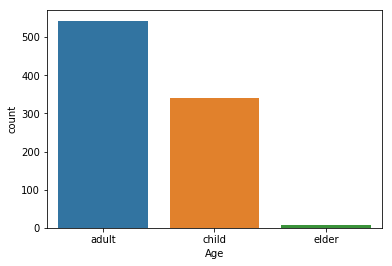

In [100]:
# Age 分類圖
sns.countplot(ageCatData)

In [130]:
# Name to identity

Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }

Name = train_df['Name']
Title = Name.map(lambda name: name.split(',')[1].split('.')[0].strip())
Title = Title.map(Title_Dictionary)

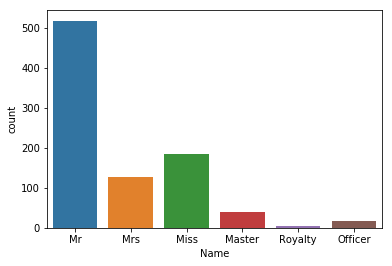

In [132]:
sns.countplot(Title)

In [169]:
FamilySize.cl

0       small
1       small
2      single
3       small
4      single
5      single
6      single
7       Large
8       small
9       small
10      small
11     single
12     single
13      Large
14     single
15     single
16      Large
17     single
18      small
19     single
20     single
21     single
22     single
23     single
24      Large
25      Large
26     single
27      Large
28     single
29     single
        ...  
861     small
862    single
863     Large
864    single
865    single
866     small
867    single
868    single
869     small
870    single
871     small
872    single
873    single
874     small
875    single
876    single
877    single
878    single
879     small
880     small
881    single
882    single
883    single
884    single
885     Large
886    single
887    single
888     small
889    single
890    single
Length: 891, dtype: object

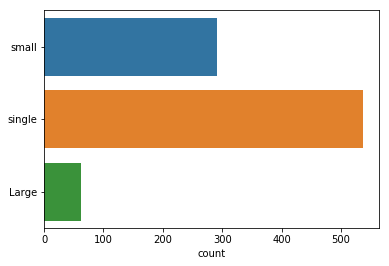

In [171]:
# Family size
FamilySize = train_df['SibSp'] + train_df['Parch']
FamilySize = FamilySize.apply(lambda size: 'Large' if size >=4 else ('single' if size==0  else 'small'))
sns.countplot(y=FamilySize)

In [145]:
Fare.index.shape

(891,)

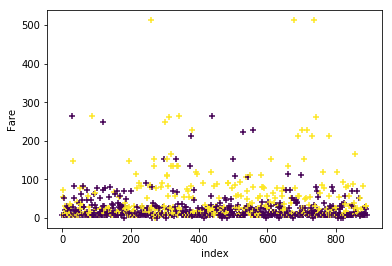

In [190]:
# Fare
Fare = train_df['Fare']
plt.scatter(Fare.index, Fare, c=train_df['Survived'], marker='+')
plt.xlabel('index')
plt.ylabel('Fare')

plt.show()


## bi-varaible exploration

In [158]:
corr = train_df.corr().round(2)

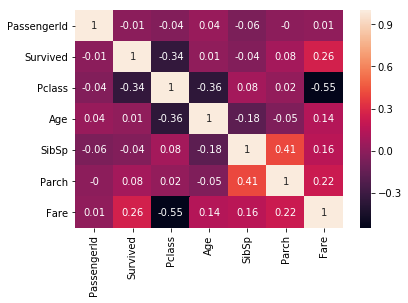

In [160]:
sns.heatmap(corr,annot=True)

In [ ]:
# sex - survival

In [ ]:
# age - survival

In [ ]:
# Title - survival 

In [ ]:
# Familysize - survival 

In [ ]:
# Fare - survival

# Data Preparation

In [ ]:
train_dev_df = pd.DataFrame()

In [ ]:
sex = pd.get_dummies(train_sex)
sex

In [ ]:
pclass = pd.get_dummies(train_df['Pclass'],prefix='Pclass')
pclass